# **Human Exploration Rover Challenge (HERC)** 

## **IEEE ESPRIT SB TEAM**  
 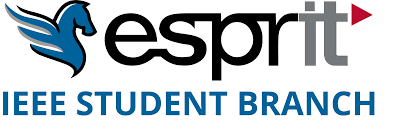

# **Speech Recognition Demo**

## Installing Package 

In [2]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

[sudo] password for mohamed: 


In [ ]:
!pip install deepspeech==0.8.2

## Importing Librairy

In [ ]:
from deepspeech import Model
import numpy as np
import os
import wave
import json

from IPython.display import Audio

## Loading model

initializing a DeepSpeech model from a file ('model.pbmm') and enhances its language model using an external scorer file ('model.scorer'). Beam search width is set to 100, with specific language model parameters (alpha: 0.93, beta: 1.18) for optimized speech recognition.

In [ ]:
model_file_path = 'model.pbmm'
lm_file_path = 'model.scorer'
beam_width = 100
lm_alpha = 0.93
lm_beta = 1.18

model = Model(model_file_path)
model.enableExternalScorer(lm_file_path)

In [ ]:
model.setScorerAlphaBeta(lm_alpha, lm_beta)
model.setBeamWidth(beam_width)

0

In [ ]:
stream = model.createStream()

### Reading WAV file

In [ ]:
def read_wav_file(filename):
    with wave.open(filename, 'rb') as w:
        rate = w.getframerate()
        frames = w.getnframes()
        buffer = w.readframes(frames)

    return buffer, rate

### Tanscribtion

In [ ]:
from IPython.display import clear_output

def transcribe_streaming(audio_file):
    buffer, rate = read_wav_file(audio_file)
    offset=0
    batch_size=8196
    text=''

    while offset < len(buffer):
      end_offset=offset+batch_size
      chunk=buffer[offset:end_offset]
      data16 = np.frombuffer(chunk, dtype=np.int16)

      stream.feedAudioContent(data16)
      text=stream.intermediateDecode()
      #clear_output(wait=True)
      print(text)
      offset=end_offset
    return True

In [9]:
from IPython.display import Audio
import librosa

file_path = 'example/speech.wav'
audio_data, fs = librosa.load(file_path, sr=None)

# Play the audio
Audio(data=audio_data, rate=fs)


In [5]:
transcribe_streaming('speech.wav')

Rover, we've arrived on this alien landscape.
What's our current location? Hello, astronaut.
We are at coordinates 34.567 minus 56.789.
Preliminary analysis indicates a rocky terrain with potential signs of ancient river birds.
Excellent, Rover.
Let's deploy the spectrometer and analyze the surface composition.
Any anomalies caught your senses attention.
Affirmative, astronaut.
I've detected higher concentrations of mineral X in the vicinity, suggesting further investigation..
